
[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0


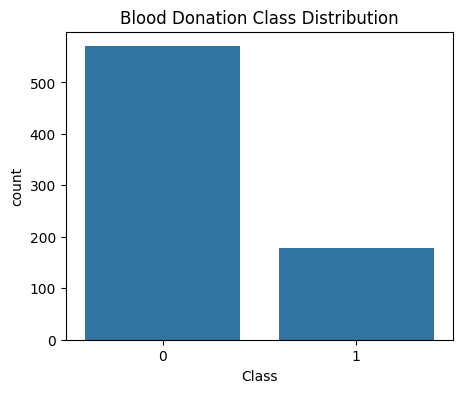

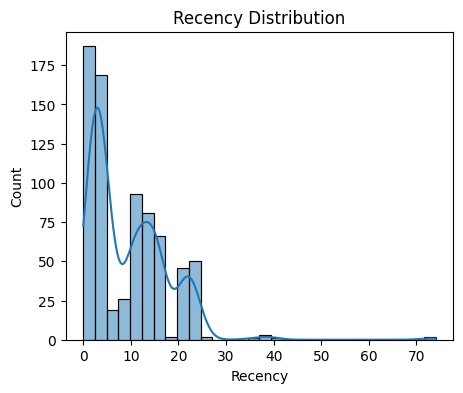

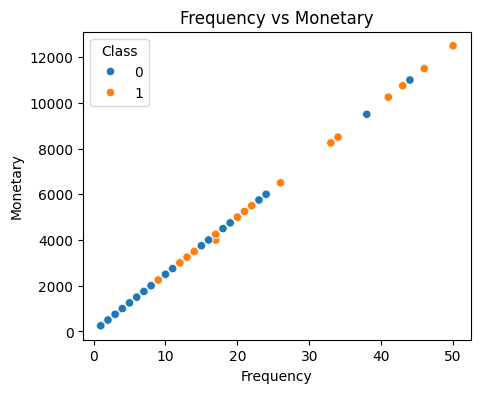

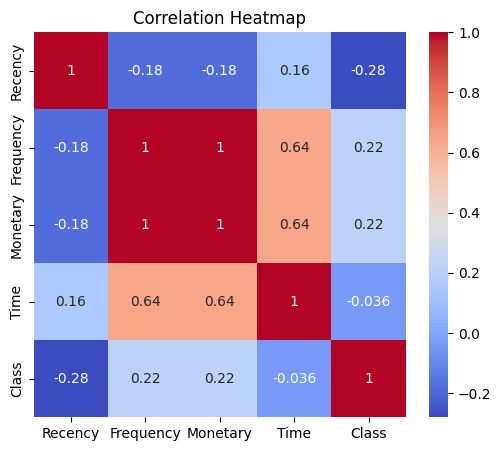

Confusion Matrix:
[[100  13]
 [ 28   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       113
           1       0.41      0.24      0.31        37

    accuracy                           0.73       150
   macro avg       0.60      0.56      0.57       150
weighted avg       0.69      0.73      0.70       150



In [ ]:
# ================================
# RFM DATA ANALYSIS + ML + GRAPHS
# Dataset: blood.csv
# Columns: Recency, Frequency, Monetary, Time, Class
# ================================

# Install (safe to keep)
!pip install pandas numpy scikit-learn matplotlib seaborn

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ----------------
# Load Dataset
# ----------------
data = pd.read_csv("blood (1).csv")
print(data.head())

# ----------------
# GRAPHS (MORE)
# ----------------

# 1. Class distribution

plt.figure(figsize=(5,4))
sns.countplot(x="Class", data=data)
plt.title("Blood Donation Class Distribution")
plt.show()

# 2. Recency distribution
plt.figure(figsize=(5,4))
sns.histplot(data["Recency"], kde=True)
plt.title("Recency Distribution")
plt.show()

# 3. Frequency vs Monetary
plt.figure(figsize=(5,4))
sns.scatterplot(x="Frequency", y="Monetary", hue="Class", data=data)
plt.title("Frequency vs Monetary")
plt.show()



# 4. Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------
# ML PART
# ----------------
X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

# ----------------
# Evaluation
# ----------------
y_pred = pipeline.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
